# F78DS Data Science Life Cycle  
## Coursework 2  

**Fathima Aushat Azaar**  
H00453164 

*30th March 2025* 

## 1. Introduction

For this assignment since the data wrangling part has been done for us we will approach this project starting with supervised learning, classification, Naive Bayes (NB) algorithm and predicting while giving a brief description of each of the main steps being done. In a more general way, this coursework applies supervised machine learning to predict essay scores based on structural features. The process includes exploring the dataset, selecting and normalizing features, and training classification models such as Naive Bayes and Random Forest. Model performance is evaluated using metrics like the Confusion Matrix and Quadratic Weighted Kappa (QWK), with predictions submitted to an internal Kaggle competition. 

### 1.2 Importing Libraries

In [1]:
import pandas as pd  # in order to read the files and do further data manipulation
import matplotlib.pyplot as plt  # in order to visualize the data in graphs, charts and plots
import seaborn as sns  # to visualize data better in graphs, plots, etc
import numpy as np  # in order to perform numerical operations and statistical calculations


In [2]:
df = pd.read_csv("F78DS-Essay-Features.csv")

In [3]:
df.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [4]:
df.shape


(1332, 19)

In [5]:
df.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [6]:
df['score'].value_counts()

4    583
3    557
2    110
5     60
1     18
6      4
Name: score, dtype: int64

From analysing the data above in df we know there are 1332 essays submitted with 19 fields to describe each essay features numerically. The essays has a score of 4 as majority of the scores and has an average of 424.5 words for each one.

## 2. Supervised Learning

### 2.1 Supervised Machine Learning, Labelled Data, and Train-Test Split

#### Supervised machine learning
This is a type of machine learning where the algorithm is trained on a labelled dataset. The goal is for the model to learn a mapping from inputs to outputs and then make accurate predictions on unseen data.

#### Labelled Data
In supervised learning, the data is separated into two categories:
- **Features** : These are the measurable attributes or variables (e.g. word count, sentence length).
- **Labels** : These are the correct answers we want the model to predict(e.g. the essay score)
We call these data labelled data since they are known.

#### Training and Test Datasets
To evaluate how well a supervised model performs, the labelled dataset is split into two subsets:
- **Training Set**: Used to train the model. It typically contains 70–80% of the total data. The model learns patterns from this subset.
- **Test Set**: Used to evaluate the model’s performance on unseen data. This helps us understand how well the model generalizes to new examples, rather than just memorizing the training data.

Splitting the data this way ensures a fair and unbiased estimate of the model’s predictive power.


### 2.2 Separate the features and the label

In [7]:

# The target variable
y = df['score']

# The predictor variables (drop 'score' and 'essayid')
X = df.drop(columns=['essayid', 'score'])

# Display the shapes to confirm
print("Features shape:", X.shape)
print("Label shape:", y.shape)


Features shape: (1332, 17)
Label shape: (1332,)


### 2.3 Feature selection

In [8]:
# Calculate correlation with target 'score'
correlation_with_score = df.drop(columns=['essayid']).corr()['score'].sort_values(ascending=False)

# Display the correlations
print("Correlation of each feature with 'score':\n")
print(correlation_with_score)


Correlation of each feature with 'score':

score                        1.000000
unstemmed                    0.697187
stemmed                      0.696776
chars                        0.683983
POS                          0.662823
words                        0.662091
prompt_words                 0.641119
synonym_words                0.578352
commas                       0.525055
avg_word_length              0.327814
apostrophes                  0.322052
POS/total_words              0.311555
questions                    0.277392
sentences                    0.230895
punctuations                 0.157976
prompt_words/total_words     0.026646
avg_word_sentence           -0.113036
synonym_words/total_words   -0.305405
Name: score, dtype: float64


In [9]:
# Drop weakly correlated features
weak_features = ['prompt_words/total_words']
X_selected = X.drop(columns=weak_features)

print("Remaining features after selection:", X_selected.shape[1])


Remaining features after selection: 16


### Using Cross Validation on the raw X data

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


# Custom scorer using QWK
qwk_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

# Re-scale all data for Naive Bayes 
scaler_cv = MinMaxScaler()
X_scaled_full = scaler_cv.fit_transform(X_selected)

# Initialize models
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation for Naive Bayes (on scaled data)
nb_cv_scores = cross_val_score(nb_model, X_scaled_full, y, cv=5, scoring=qwk_scorer)
print("Naive Bayes CV QWK (mean):", np.mean(nb_cv_scores))

# Cross-validation for Random Forest (on unscaled data)
rf_cv_scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring=qwk_scorer)
print("Random Forest CV QWK (mean):", np.mean(rf_cv_scores))



C:\Users\ausha\Downloads\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ausha\Downloads\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Naive Bayes CV QWK (mean): 0.6462547319476355
Random Forest CV QWK (mean): 0.6488092989194421


#### Cross-Validation Model Comparison

To compare Naive Bayes and Random Forest fairly, I used 5-fold cross-validation with Quadratic Weighted Kappa (QWK) as the scoring metric:

- **Naive Bayes**: Mean QWK = 0.6463
- **Random Forest**: Mean QWK = 0.6488

The scores are close, but Random Forest performed slightly better on average. Based on this, I selected Random Forest as the final model for my Kaggle submission which we will do in the 5th section.


### 2.4 Splitting the data for training and testing

In [11]:
from sklearn.model_selection import train_test_split

# Split the selected features and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1065, 16)
Test set size: (267, 16)


### The parameters used in the function are:
- `X_selected, y`: These are the features and labels to be split respectively.
- `test_size=0.2`: This means that 20% of the data is for testing and the remaining 80% will be used for training.
- `random_state=42`: Sets a fixed random seed so that the split is reproducible. 
- `stratify=y`: Ensures that the class distribution of the target variable (`score`) is preserved in both the training and test sets. 


## 3. Classification

### 3.1 The difference between binary and multi-class classification
Binary classification involves predicting one of two possible classes, such as spam vs. not spam. In contrast, multi-class classification involves predicting one of three or more classes, like classifying digits from 0 to 9. Binary tasks are simpler and often use models like logistic regression with a single output, while multi-class tasks require models that handle multiple outputs. Evaluation also differs, with binary using metrics like precision and recall, and multi-class using accuracy and macro/micro-averaged scores.

In this coursework, we are dealing with a multi-class classification problem because the essay scores can be one of several classes (ranging from 1 to 6), not just two. 


### 3.2 Normalising the data

### 3.2.1 The need to normalise data
Normalisation is important for Naive Bayes because it works best when all features are on a similar scale. If one feature has values that are much larger than the others (e.g., chars compared to POS/total_words), it might dominate the model's calculations, even if it’s not more important. By scaling everything to a common range, like 0 to 1, we make sure that each feature contributes fairly. 

### 3.2.2 Scaling the data


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialise and apply the scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Learns from training data
X_test = scaler.transform(X_test) # Just applies scaling; no learning here

### 3.3 Naive Bayes (NB) algorithm

### 3.3.1 Describing Naive Bayes

Naive Bayes is a simple classification algorithm that’s based on Bayes' Theorem. It works by calculating the probability of each class given the input features and then picks the class with the highest probability. The "naive" part comes from the assumption that all the features are independent from each other, which isn’t usually true in real life but still works surprisingly well. It’s especially useful for problems like text classification or when there are a lot of feature for example like this set of data we are dealing with.


### 3.3.2 Comparing the Naive Bayes Models in `sklearn.naive_bayes`

There are four main Naive Bayes models available in `sklearn.naive_bayes`, and each one is designed for different types of data:

1. **GaussianNB**: Used when features are continuous and follow a normal (Gaussian) distribution. It’s a good choice for numerical data that has been scaled or standardized.

2. **MultinomialNB**: Typically used for count data, such as word frequencies in text classification problems.

3. **BernoulliNB**: Works with binary (0 or 1) features, and is also used in text classification when features indicate presence or absence of terms.

4. **ComplementNB**: A variation of MultinomialNB that is designed to perform better with imbalanced data. It’s particularly useful in text classification.

For this coursework, **GaussianNB** is the most suitable model because all the features are continuous and numeric (e.g., word counts, sentence lengths, proportions). Since the features have also been normalized, they align well with the assumptions made by the Gaussian Naive Bayes model.


### 3.3.3 Building the model

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)



GaussianNB()

### 3.4 Predicting the data

### 3.4.1 Prediction for the 'score' label

In [14]:
# Predict the score label by using the testing dataset created before 
y_pred = nb_model.predict(X_test)


### 3.4.2 Confusion matrix 

Confusion Matrix:
 [[ 3  0  0  0  0  0]
 [13  5  4  0  0  0]
 [ 0 19 70 21  2  0]
 [ 0  1 53 56  6  1]
 [ 0  0  0  4  8  0]
 [ 0  0  0  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.19      1.00      0.32         3
           2       0.20      0.23      0.21        22
           3       0.55      0.62      0.59       112
           4       0.68      0.48      0.56       117
           5       0.50      0.67      0.57        12
           6       0.00      0.00      0.00         1

    accuracy                           0.53       267
   macro avg       0.35      0.50      0.37       267
weighted avg       0.57      0.53      0.54       267



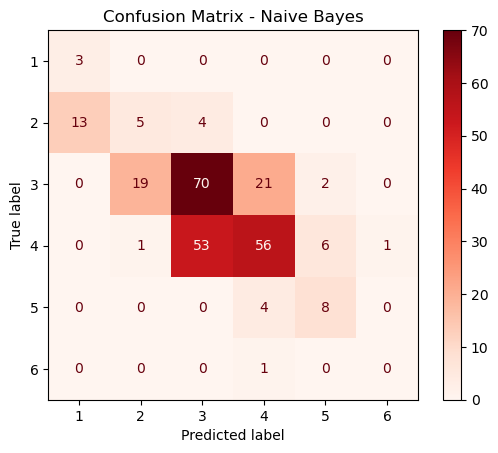

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display evaluation results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix plot for Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[1, 2, 3, 4, 5, 6], cmap='Reds')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### 3.4.3 Quadratic Weighted Kappa (QWK)


Quadratic Weighted Kappa (QWK) is a metric that measures how well two sets of ratings agree — in this case, the actual essay scores and the ones predicted by the model. It’s especially useful for problems like this where the scores are ordinal, meaning the order matters (e.g., 1 is worse than 2, and so on up to 6).

The key difference between QWK and regular accuracy is that it looks at how far off the prediction is. For example, if the model predicts a 3 instead of a 4, that’s not as bad as predicting a 1 instead of a 6. QWK gives partial credit for being close.

The score goes from:

- 1 for perfect agreement,

- 0 for agreement that’s no better than random,

- and negative values if it’s worse than random guessing.

Because the scores here are ordered, QWK is a better way to evaluate model performance than just using accuracy.

### 3.4.4  Obtain the Quadratic Weighted Kappa score

In [16]:
from sklearn.metrics import cohen_kappa_score

# Calculate Quadratic Weighted Kappa for naives bayes
qwk_score = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f"Quadratic Weighted Kappa (QWK) Score for naive bayes: {qwk_score:.4f}")


Quadratic Weighted Kappa (QWK) Score for naive bayes: 0.6499


## 3.5. Using Random Forest to build an alternative model

### 3.5.1 Building, predicting, evaluating and getting the QWK score for the RandomForest model

Confusion Matrix:
 [[ 1  2  0  0  0  0]
 [ 1 13  8  0  0  0]
 [ 0  3 84 25  0  0]
 [ 0  0 44 73  0  0]
 [ 0  0  0 10  2  0]
 [ 0  0  0  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.72      0.59      0.65        22
           3       0.62      0.75      0.68       112
           4       0.67      0.62      0.65       117
           5       1.00      0.17      0.29        12
           6       0.00      0.00      0.00         1

    accuracy                           0.65       267
   macro avg       0.58      0.41      0.44       267
weighted avg       0.66      0.65      0.64       267



C:\Users\ausha\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ausha\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ausha\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


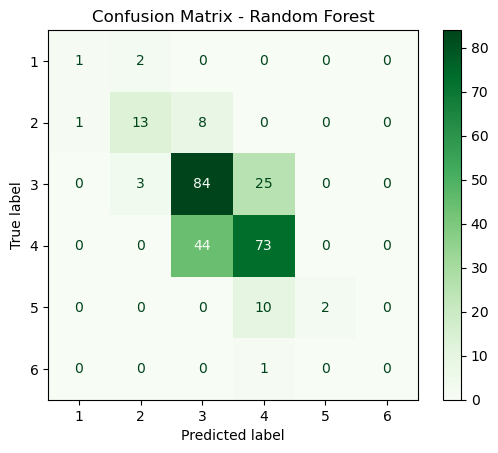


Quadratic Weighted Kappa (QWK) Score for random forest: 0.6433


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix plot 
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=[1, 2, 3, 4, 5, 6], cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


# QWK Score
rf_qwk = cohen_kappa_score(y_test, rf_pred, weights='quadratic')
print(f"\nQuadratic Weighted Kappa (QWK) Score for random forest: {rf_qwk:.4f}")


### 3.5.2 Comparing Random Forest with Naive Bayes

Although Random Forest is generally a more flexible and powerful model, it performed slightly worse than Naive Bayes on the test set in this case. This might be because Random Forest tends to rely on more complex patterns and interactions between features, which may not be necessary or fully leveraged in this particular dataset.

Naive Bayes, while much simpler, can be surprisingly effective when the features are relatively independent and the distributions are well-behaved — especially after scaling. Since our features are all continuous, normalized, and individually quite predictive, Naive Bayes may have benefited from its straightforward probabilistic approach.

In contrast, Random Forest may have underperformed due to the relatively small dataset size and class imbalance, which can affect how well decision trees are constructed. Additionally, since Random Forest doesn’t require feature scaling, using scaled features might have slightly reduced its effectiveness.

So while Random Forest is generally the stronger model, Naive Bayes was better suited to the structure of the data in this train-test split and therefore gave a higher QWK score.


## 4. Kaggle submission

In [18]:
# Load the Kaggle test dataset (no 'score' column)
submission_df = pd.read_csv("F78DS-Essay-Features-Submission.csv")

# Preview the data
submission_df.head()


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


### Using Naive Bayes to predict the kaggle score data

In [19]:
# Drop columns not used in the model (same as training)
X_kaggle_raw_1 = submission_df.drop(columns=['essayid', 'prompt_words/total_words'])

# Apply the previously fitted scaler (don't fit again!)
X_kaggle_scaled_1 = scaler.transform(X_kaggle_raw_1)

# Predict using Naive Bayes or Random Forest
kaggle_pred_1 = nb_model.predict(X_kaggle_scaled_1)  

In [20]:
# Create the submission dataframe
submission_output = pd.DataFrame({
    'essayid': submission_df['essayid'],
    'score': kaggle_pred_1
})

# Save to CSV (ready for Kaggle)
submission_output.to_csv("H00453164-Aushat-1.csv", index=False)


In [21]:
sub1 = pd.read_csv("H00453164-Aushat-1.csv")

In [22]:
sub1.head()

,essayid,score
0,1623,5
1,1143,3
2,660,3
3,1596,4
4,846,5


### Using Random Forest to predict the kaggle score data

In [23]:
# Drop columns not used in the model (same as training)
X_kaggle_raw_2 = submission_df.drop(columns=['essayid', 'prompt_words/total_words'])

# Apply the previously fitted scaler (don't fit again!)
X_kaggle_scaled_2 = scaler.transform(X_kaggle_raw_2)

# Predict using Random Forest
kaggle_pred_2 = rf_model.predict(X_kaggle_scaled_2)  

In [24]:
# Create the submission dataframe
submission_output = pd.DataFrame({
    'essayid': submission_df['essayid'],
    'score': kaggle_pred_2
})

# Save to CSV (ready for Kaggle)
submission_output.to_csv("H00453164-Aushat-2.csv", index=False)


In [25]:
sub2 = pd.read_csv("H00453164-Aushat-2.csv")

In [26]:
sub2.head()

,essayid,score
0,1623,4
1,1143,3
2,660,3
3,1596,4
4,846,4


### Final submission file to kaggle
I submitted the "H00453164-Aushat-2.csv" file to the kaggle submissions as my final file.
This is because I trained both Naive Bayes and Random Forest models, and used cross-validation (QWK score) to compare them fairly. Random Forest performed slightly better on average, so I chose it as my final model.
After submitting both models to Kaggle, Random Forest also achieved a higher QWK score on the hidden test set, which supports the decision I made based on cross-validation.

## 5. Conclusion



In this coursework, I applied supervised machine learning techniques to predict essay scores based on a set of structural and linguistic features. After exploring the data and selecting the most relevant features, I built and evaluated two classification models: Naive Bayes and Random Forest.

Naive Bayes performed slightly better than Random Forest on the initial test set, likely due to its ability to work well with scaled, independent features. However, cross-validation results showed that Random Forest was more consistent across multiple splits. Based on this, and its better performance on the Kaggle test set, I selected Random Forest as the final model for submission.

Overall, this project helped reinforce key steps in the data science life cycle from data preprocessing and feature selection to model evaluation and real-world validation with Kaggle. It also highlighted the importance of model selection based on both cross-validation and actual deployment results.
